### Selenium

In [2]:
!pip install selenium
!pip install webdriver-manager

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

In [153]:
str = 'dined on November, 2 11011'
print (str[9:])

November, 2 11011


In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


In [21]:
url = 'https://www.opentable.com/r/carmines-bellevue?corrid=e568ca54-4ff5-4c7b-8171-f2008abfb121&avt=eyJ2IjoyLCJtIjoxLCJwIjowLCJzIjowLCJuIjowfQ&p=2&sd=2024-12-01T19%3A00%3A00'

In [43]:
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import StaleElementReferenceException, TimeoutException
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import time

In [30]:


def getReviews(url):

    driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
    time.sleep(2)
    
    Dates = []
    Rating1 = []
    Rating2 = []
    Rating3 = []
    Rating4 = []
    Name = []
    Review = []
    
    page = 0
    driver.get(url)
    time.sleep(2)
    

    while True:
        if (page == 180):
            break
        try:
            Data1 = BeautifulSoup(driver.page_source, 'html.parser')
            Data2 = Data1.find_all('li', class_='afkKaa-4T28-')
            for D in Data2:
                
                try:
                    name = D.find ('p', class_ = '_1p30XHjz2rI- C7Tp-bANpE4-')
                    date = D.find ('p', class_ = 'iLkEeQbexGs-')
                    if date:
                        date = str (date.text)[9:]  
                        date = datetime.strptime(date, "%B %d, %Y").date()
                    rating = D.find_all ('span', class_ = '-y00OllFiMo-')
                    r1 = rating[0].text
                    r2 = rating[1].text
                    r3 = rating[2].text
                    r4 = rating[3].text

                    review = D.find ('span', class_ = 'l9bbXUdC9v0- ZatlKKd1hyc- ukvN6yaH1Ds-')
                except:
                    continue

                
                Name.append (str (name.text))
                Dates.append (str (date))
                Rating1.append (r1)
                Rating2.append (r2)
                Rating3.append (r3)
                Rating4.append (r4)
                Review.append(str (review.text))
    
          
            
            print(f"Scraped {len(Dates)} reviews so far.")

            try:
                next = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'a[aria-label="Go to the next page"]')))
                next.click()
                page+=1
                time.sleep(2)  
            except TimeoutException:
                break
        
        except StaleElementReferenceException:
            print("A stale element encountered .. . . ")
            continue
        except Exception as e:
            print(f"Error: {e}")
            break
    
    driver.quit()
   
    return pd.DataFrame({
        'Name' : Name,
        'Overall_Rating': Rating1,
        'Food_Rating': Rating2,
        'Service_Rating': Rating3,
        'Ambience_Rating': Rating4,
        'Dined_Date' : Dates,
        'Reviews': Review
    })
    

In [31]:
url = 'https://www.opentable.com/r/carmines-bellevue?corrid=e568ca54-4ff5-4c7b-8171-f2008abfb121&avt=eyJ2IjoyLCJtIjoxLCJwIjowLCJzIjowLCJuIjowfQ&p=2&sd=2024-12-01T19%3A00%3A00'

Data = getReviews(url)
Data.to_csv('my_reviews.csv', index = False)


Scraped 9 reviews so far.
A stale element encountered .. . . 
Scraped 9 reviews so far.
Scraped 19 reviews so far.
Scraped 19 reviews so far.
Scraped 19 reviews so far.
Scraped 29 reviews so far.
Scraped 39 reviews so far.
Scraped 49 reviews so far.
Scraped 59 reviews so far.
Scraped 69 reviews so far.
Scraped 79 reviews so far.
Scraped 89 reviews so far.
Scraped 99 reviews so far.
Scraped 109 reviews so far.
Scraped 119 reviews so far.
Scraped 129 reviews so far.
Scraped 139 reviews so far.
Scraped 149 reviews so far.
Scraped 159 reviews so far.
Scraped 169 reviews so far.
Scraped 179 reviews so far.
Scraped 189 reviews so far.
Scraped 199 reviews so far.
Scraped 209 reviews so far.
Scraped 219 reviews so far.
Scraped 229 reviews so far.
Scraped 239 reviews so far.
Scraped 249 reviews so far.
Scraped 259 reviews so far.
Scraped 269 reviews so far.
Scraped 279 reviews so far.
Scraped 289 reviews so far.
Scraped 299 reviews so far.
Scraped 309 reviews so far.
Scraped 319 reviews so far.

In [4]:
def getRestaurantName(url):
    driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
    time.sleep(2)
    driver.get(url)
    time.sleep(2)
    name = ''
    
    
    Data1 = BeautifulSoup(driver.page_source, 'html.parser')
    Data2 = Data1.find('h1', class_='E-vwXONV9nc-')
    name = str(Data2.text)
    driver.quit()
    return name
    

In [10]:
def getRestaurantName(url):
    driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
    time.sleep(2)
    driver.get(url)
    time.sleep(2)
    name = ''
    
    
    Data1 = BeautifulSoup(driver.page_source, 'html.parser')
    Data2 = Data1.find('h1', class_='E-vwXONV9nc-')
    Data3 = Data1.find_all ('span', class_ = 'yEg-cOaKGpI-') 

    name = str(Data2.text)
    r1 = str (Data3[0].text)
    r2 = str (Data3[1].text)
    r3 = str (Data3[2].text)
    r4 = str (Data3[3].text)
    print (r1)
    print (r2)
    print (r3)
    print (r4)
    driver.quit()
    return pd.DataFrame({'Restaurant_Name': [name],
                  'Food_Rating': [r1],
                  'Service_Rating': [r2],
                  'Ambience_Rating': [r3],
                  'Value_Rating': [r4]
                  })

In [11]:
url = 'https://www.opentable.com/r/carmines-bellevue?corrid=e568ca54-4ff5-4c7b-8171-f2008abfb121&avt=eyJ2IjoyLCJtIjoxLCJwIjowLCJzIjowLCJuIjowfQ&p=2&sd=2024-12-01T19%3A00%3A00'

data = getRestaurantName(url)
data.to_csv ('restaurant_name.csv', index = False)


4.8
4.8
4.8
4.4


In [6]:
url = 'https://www.opentable.com/r/carmines-bellevue?corrid=e568ca54-4ff5-4c7b-8171-f2008abfb121&avt=eyJ2IjoyLCJtIjoxLCJwIjowLCJzIjowLCJuIjowfQ&p=2&sd=2024-12-01T19%3A00%3A00'
name = getRestaurantName(url)
print (name)
data = pd.DataFrame({'Restaurant_Name': [name]})
data.to_csv ('restaurant_name.csv', index = False)

Carmine's - Bellevue


In [95]:
Data.to_csv("ratings.csv", index=False)


In [26]:
print (Data)

None


In [20]:
section1 = driver.find_element(By.XPATH,'/html/body/div[1]/div[1]/div[1]/main/div/div/div/section[1]/div/div/div[1]/h1')
print (section1.text)
# search_bar.send_keys('Samsung' +Keys.RETURN)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"/html/body/div[1]/div[1]/div[1]/main/div/div/div/section[1]/div/div/div[1]/h1"}
  (Session info: chrome=131.0.6778.139); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x009134A3+25059]
	(No symbol) [0x0089CEA4]
	(No symbol) [0x0077BEC3]
	(No symbol) [0x007BFD86]
	(No symbol) [0x007BFFCB]
	(No symbol) [0x007FD952]
	(No symbol) [0x007E1F44]
	(No symbol) [0x007FB51E]
	(No symbol) [0x007E1C96]
	(No symbol) [0x007B3FAC]
	(No symbol) [0x007B4F3D]
	GetHandleVerifier [0x00C05613+3113811]
	GetHandleVerifier [0x00C1A2DA+3199002]
	GetHandleVerifier [0x00C12AB2+3168242]
	GetHandleVerifier [0x009B3310+680016]
	(No symbol) [0x008A57ED]
	(No symbol) [0x008A2A98]
	(No symbol) [0x008A2C35]
	(No symbol) [0x00895890]
	BaseThreadInitThunk [0x77115D49+25]
	RtlInitializeExceptionChain [0x77DDCEBB+107]
	RtlGetAppContainerNamedObjectPath [0x77DDCE41+561]


In [13]:
list = []
section2 = driver.find_elements(By.XPATH,'/html/body/div[1]/div[1]/div[1]/main/div/div/div/section[8]/section/section/article/ul/li')
for a in section2 :
    b = a.find_element(By.XPATH, 'span[1]')
    list.append (float (b.text))

print (list)

[]


In [ ]:
def getData(url):

    driver.get(url)
    restaurant_name = driver.find_element(By.XPATH,'/html/body/div[1]/div[1]/div[1]/main/div/div/div/section[1]/div/div/div[1]/h1')
    restaurant_name = str(restaurant_name.text)

    ratting_in_different_categories = []
    section2 = driver.find_elements(By.XPATH,'/html/body/div[1]/div[1]/div[1]/main/div/div/div/section[8]/section/section/article/ul/li')
    for a in section2 :
        b = a.find_element(By.XPATH, 'span[1]')
        ratting_in_different_categories.append (float (b.text))

    return restaurant_name, ratting_in_different_categories



In [1]:
from datetime import datetime

date_string = "September 14, 2016"
date_object = datetime.strptime(date_string, "%B %d, %Y")

print(date_object)  # Output: 2016-09-14 00:00:00

2016-09-14 00:00:00


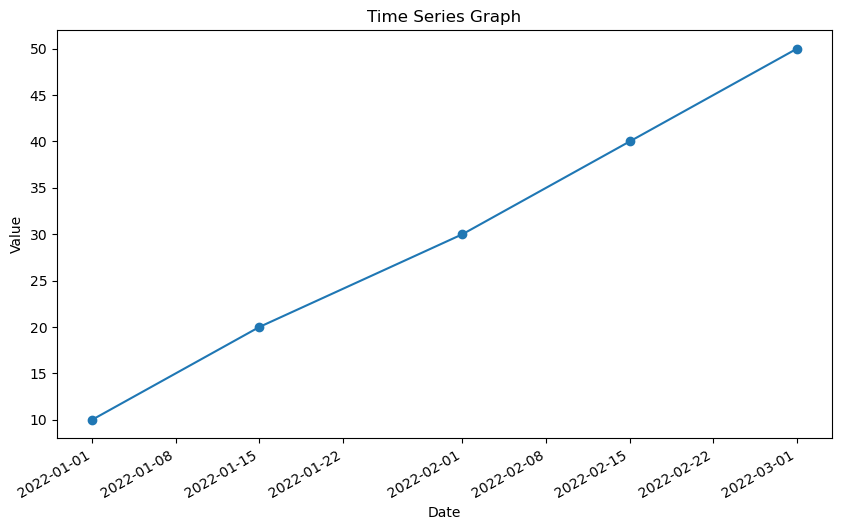

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Define the dates and values
dates = [datetime.date(2022, 1, 1), datetime.date(2022, 1, 15), datetime.date(2022, 2, 1), datetime.date(2022, 2, 15), datetime.date(2022, 3, 1)]
values = [10, 20, 30, 40, 50]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(dates, values, marker='o')

# Format the x-axis to display dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

# Add title and labels
plt.title('Time Series Graph')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

In [145]:
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

name = []
date = []
OverallRating = []
FoodRating = []
ServiceRating = []
AmbienceRating = []
review = []
l = 0

while True:
    # Retrieve the section containing the reviews on the current page
    section2 = driver.find_elements(By.XPATH, '/html/body/div[1]/div[1]/div[1]/main/div/div/div/section[8]/section/ol/li')

    # Loop through each review in section2
    for a in section2:
        # Extract data for each review
        x = a.find_element(By.XPATH, 'section/p[1]')
        name.append(x.text)
        
        y = a.find_element(By.XPATH, 'div/div[1]/p')
        date.append(y.text)
        
        z = a.find_elements(By.XPATH, 'div/ol/li')
        list = []
        for k in z:
            w = k.find_element(By.XPATH, 'span')
            list.append(w.text)
        OverallRating.append(list[0])
        FoodRating.append(list[1])
        ServiceRating.append(list[2])
        AmbienceRating.append(list[3])
        
        v = a.find_element(By.XPATH, 'div/div[2]/span[1]')
        review.append(v.text)

    # Increment l to keep track of progress (optional, you can remove this if not needed)
    l += 1

    # Check if we should continue to the next page
    try:
        # Wait for the "Next Page" button to be clickable
        next_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, 'a[aria-label="Go to the next page"]'))
        )
        
        # Click the next page button
        next_button.click()
        
        # Allow time for the next page to load
        time.sleep(2)
    
    except Exception as e:
        # If no more pages, break out of the loop
        print("No more pages left to scrape.")
        break

# Print the results
print(name)
print(date)
print(OverallRating)
print(FoodRating)
print(ServiceRating)
print(AmbienceRating)
print(review)


No more pages left to scrape.
['Mila', 'Jena', 'Claire', 'Chris', 'Debra', 'Sam', 'Emmy', 'Jennifer', 'Susan', 'OpenTable Diner', 'Angela', 'karan', 'Regan', 'Steve', 'Bill', 'Al', 'Craig', 'Eddie', 'Melody', 'Matt', 'Debbie', 'Todd', 'Jill', 'Ross', 'Nate', 'Neil', 'cy', 'Arman', 'Jessica', 'Ania', 'Scott', 'pepper', 'Deepanjali', 'karan', 'Hugh', 'Erika', 'OpenTable Diner', 'OpenTable Diner', 'Sherrie', 'Monique', 'Jamie', 'Stephanie', 'ADRIANN', 'Linh', 'Teresa', 'Jeri', 'YongChul', 'S. Rogers', 'Melody', 'OpenTable Diner', 'Kristi', 'Scot', 'Anne', 'Beverly', 'Tamikah', 'OpenTable Diner', 'Ania', 'Jennifer', 'OpenTable Diner', 'OpenTable Diner', 'Ania', 'Susie', 'Jeffrey', 'Dee', 'karan', 'RebeccaS', 'Brent', 'Lynn', 'Michael', 'Cathy', 'JeanneB', 'Teresa', 'Steve', 'OpenTable Diner', 'MeganD', 'IvanB', 'Lkelly616', 'MarisaB', 'JaiV', 'DavidS', 'OpenTable Diner', 'ChristineA', 'OpenTable Diner', 'oliver', 'Julia', 'OpenTable Diner', 'Mark', 'Edward', 'OpenTable Diner', 'GregB', 'Op

In [149]:
print (len (review))
print (len (name))
print (len (OverallRating))
print (len (FoodRating))
print (len (ServiceRating))
print (len (AmbienceRating))
print (len (date))

1360
1360
1360
1360
1360
1360
1360


In [141]:
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

name = []
date = []
OverallRating = []
FoodRating = []
ServiceRating = []
AmbienceRating = []
review = []
l = 0

while True:
    # Retrieve the section containing the reviews on the current page
    section2 = driver.find_elements(By.XPATH, '/html/body/div[1]/div[1]/div[1]/main/div/div/div/section[8]/section/ol/li')

    # Loop through each review in section2
    for a in section2:
        # Extract data for each review
        x = a.find_element(By.XPATH, 'section/p[1]')
        name.append(x.text)
        
        y = a.find_element(By.XPATH, 'div/div[1]/p')
        date.append(y.text)
        
        z = a.find_elements(By.XPATH, 'div/ol/li')
        list = []
        for k in z:
            w = k.find_element(By.XPATH, 'span')
            list.append(w.text)
        OverallRating.append(list[0])
        FoodRating.append(list[1])
        ServiceRating.append(list[2])
        AmbienceRating.append(list[3])
        
        v = a.find_element(By.XPATH, 'div/div[2]/span[1]')
        review.append(v.text)

    # Increment l to keep track of progress (optional, you can remove this if not needed)
    l += 1

    # Check if we should continue to the next page
    try:
        # Wait for the "Next Page" button to be clickable
        next_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, 'a[aria-label="Go to the next page"]'))
        )
        
        # Click the next page button
        next_button.click()
        
        # Allow time for the next page to load
        time.sleep(2)
    
    except Exception as e:
        # If no more pages, break out of the loop
        print("No more pages left to scrape.")
        break

# Print the results
print(name)
print(date)
print(OverallRating)
print(FoodRating)
print(ServiceRating)
print(AmbienceRating)
print(review)


WebDriverException: Message: disconnected: not connected to DevTools
  (failed to check if window was closed: disconnected: not connected to DevTools)
  (Session info: chrome=131.0.6778.109)
Stacktrace:
	GetHandleVerifier [0x004D3433+25059]
	(No symbol) [0x0045CE34]
	(No symbol) [0x0033BEC3]
	(No symbol) [0x0032C468]
	(No symbol) [0x0032C389]
	(No symbol) [0x0033E350]
	(No symbol) [0x003BAE69]
	(No symbol) [0x003A1C96]
	(No symbol) [0x00373FAC]
	(No symbol) [0x00374F3D]
	GetHandleVerifier [0x007C5593+3113795]
	GetHandleVerifier [0x007DA25A+3198986]
	GetHandleVerifier [0x007D2A32+3168226]
	GetHandleVerifier [0x005732A0+680016]
	(No symbol) [0x0046577D]
	(No symbol) [0x00462A28]
	(No symbol) [0x00462BC5]
	(No symbol) [0x00455820]
	BaseThreadInitThunk [0x76445D49+25]
	RtlInitializeExceptionChain [0x772ACEBB+107]
	RtlGetAppContainerNamedObjectPath [0x772ACE41+561]


In [128]:
list = []
section2 = driver.find_element(By.XPATH,'/html/body/div[1]/div[1]/div[1]/main/div/div[2]/div/section[8]/section/footer/div/div[2]/a')

next_button = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.CSS_SELECTOR, 'a[aria-label="Go to the next page"]'))
)
next_button.click()
# next_page_href = section2.get_attribute('href')
# print (next_page_href)
# driver.get(next_page_href)

In [96]:
ad_grid = driver.find_element(By.XPATH, '/html/body')
ad_cards = ad_grid.find_elements(By.CLASS_NAME, '_17mcb')
for i in ad_cards:
    print(i.text)


### Beautiful soaup

In [97]:
!pip install beautifulsoup4
!pip install requests

In [98]:
from bs4 import BeautifulSoup
import requests
url = "https://en.wikipedia.org/wiki/Muhammad_Ali_Jinnah"
req = requests.get(url)
soup = BeautifulSoup(req.text, "html.parser")
print(soup.title)

<title>Muhammad Ali Jinnah - Wikipedia</title>


In [99]:
soup.body

<body class="skin--responsive skin-vector skin-vector-search-vue mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-0 ns-subject page-Muhammad_Ali_Jinnah rootpage-Muhammad_Ali_Jinnah skin-vector-2022 action-view"><a class="mw-jump-link" href="#bodyContent">Jump to content</a>
<div class="vector-header-container">
<header class="vector-header mw-header">
<div class="vector-header-start">
<nav aria-label="Site" class="vector-main-menu-landmark">
<div class="vector-dropdown vector-main-menu-dropdown vector-button-flush-left vector-button-flush-right" id="vector-main-menu-dropdown">
<input aria-haspopup="true" aria-label="Main menu" class="vector-dropdown-checkbox" data-event-name="ui.dropdown-vector-main-menu-dropdown" id="vector-main-menu-dropdown-checkbox" role="button" type="checkbox"/>
<label aria-hidden="true" class="vector-dropdown-label cdx-button cdx-button--fake-button cdx-button--fake-button--enabled cdx-button--weight-quiet cdx-button--icon-only" for="vector-main-menu-dropdown-chec

In [115]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Initialize WebDriver
driver = webdriver.Chrome()  # Ensure chromedriver is in your PATH

# Open the restaurant's OpenTable page
url = "https://www.opentable.com/r/carmines-bellevue?corrid=e568ca54-4ff5-4c7b-8171-f2008abfb121&avt=eyJ2IjoyLCJtIjoxLCJwIjowLCJzIjowLCJuIjowfQ&p=2&sd=2024-12-01T19%3A00%3A00"
driver.get(url)

# Wait for a specific element to ensure the page is loaded
try:
    # Example: wait for a review section to be loaded (you can adjust this XPath to your page's content)
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//section[@data-test="reviews-list"]'))
    )

    # After the page is loaded, get the page content
    page_content = driver.page_source
    print(page_content)  # Output the entire HTML content of the page

finally:
    driver.quit()  # Always close the browser after scraping


TimeoutException: Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF74FD66CF5+28821]
	(No symbol) [0x00007FF74FCD3880]
	(No symbol) [0x00007FF74FB7578A]
	(No symbol) [0x00007FF74FBC91BE]
	(No symbol) [0x00007FF74FBC94AC]
	(No symbol) [0x00007FF74FC12647]
	(No symbol) [0x00007FF74FBEF33F]
	(No symbol) [0x00007FF74FC0F412]
	(No symbol) [0x00007FF74FBEF0A3]
	(No symbol) [0x00007FF74FBBA778]
	(No symbol) [0x00007FF74FBBB8E1]
	GetHandleVerifier [0x00007FF75009FCED+3408013]
	GetHandleVerifier [0x00007FF7500B745F+3504127]
	GetHandleVerifier [0x00007FF7500AB63D+3455453]
	GetHandleVerifier [0x00007FF74FE2BDFB+835995]
	(No symbol) [0x00007FF74FCDEB9F]
	(No symbol) [0x00007FF74FCDA854]
	(No symbol) [0x00007FF74FCDA9ED]
	(No symbol) [0x00007FF74FCCA1D9]
	BaseThreadInitThunk [0x00007FFBAA47DBE7+23]
	RtlUserThreadStart [0x00007FFBAC5FFBEC+44]


In [100]:
print(soup.text)





Muhammad Ali Jinnah - Wikipedia



































Jump to content







Main menu





Main menu
move to sidebar
hide



		Navigation
	


Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us





		Contribute
	


HelpLearn to editCommunity portalRecent changesUpload file



















Search











Search






















Appearance
















Donate

Create account

Log in








Personal tools





Donate Create account Log in





		Pages for logged out editors learn more



ContributionsTalk




























Contents
move to sidebar
hide




(Top)





1
Early years




Toggle Early years subsection





1.1
Family and childhood








1.2
Education in England










2
Legal and early political career




Toggle Legal and early political career subsection





2.1
Barrister








2.2
Trade unionist








2.3
Rising leader








2.4
Farewell to Congress










3
Wilderness years; interlude in England

### Wikiedia scrapping

In [73]:
url = 'https://en.wikipedia.org/wiki/List_of_universities_in_Pakistan'

driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
driver.get(url)


In [74]:
tables = driver.find_elements(By.XPATH, "//table[@class='wikitable sortable jquery-tablesorter']")

In [85]:
links = []

table = tables[0]
    
body = table.find_element(By.TAG_NAME, 'tbody')
rows = body.find_elements(By.TAG_NAME, 'tr')


for row in rows:
    uni_name = row.find_element(By.TAG_NAME, 'td')
    try:
        uni_link = uni_name.find_element(By.TAG_NAME, 'a')
     
    except NoSuchElementException:
        continue
        print(uni_link.get_attribute('href'))
        driver.execute_script(f"window.open('{uni_link.get_attribute('href')}','secondtab');")
        driver.switch_to.window(driver.window_handles[1]) 

        driver.execute_script("window.scrollTo(0, 500);")
        time.sleep(2)
        driver.execute_script("window.scrollTo(500, 800);")
        time.sleep(2)
        driver.execute_script("window.scrollTo(800, 1000);")


# Print extracted links
#print("Extracted links:", links)

# Close the browser
#driver.quit()